# Answers to week 1 quiz and class

## Quiz

### Q1: For computing the nth Fibonacci number, the table method is O(n) and the matrix method is O(log(n)). Which method should you use to compute the first n Fibonacci numbers?

The table method is better because you can compute $F(n)$ once and then just read off the other values. For the matrix method you'd need to recompute $F(k)$ for $k=1,\ldots,n$ making it $O(n\log n)$.

### Q2: What is the first value of n where the analytic method stops working for computing the nth Fibonacci number (using 64 bit floats)?

Here's one way to compute that:

In [20]:
def F(n):
    a = b = 1
    for i in range(3, n+1):
        a, b = b, a+b
    return b

In [21]:
def G(n):
    phi = (1+5**.5)/2
    return round((phi**n-(1-phi)**n)/5**.5)

In [22]:
for n in range(2, 100):
    if F(n)!=G(n):
        print(n)
        break

71


In [23]:
n, F(n), G(n)

(71, 308061521170129, 308061521170130)

### Q3: If M is a matrix, what is the smallest number of matrix multiplications you would need to compute M to the power of 27?

You can compute it as:

$M_1=M$

$M_2=M*M$

$M_3=M_2*M_2=M^4$

$M_4=M_3*M_3=M^8$

$M_5=M_4*M_1=M^9$

$M_6=M_5*M_5=M^{18}$

$M_7=M_6*M_5=M^{27}$

This is a total of 6 matrix multiplications.

Here's some code that shows this is the shortest solution. Exercise: how does this work?

In [24]:
def findbest():
    processed = set()
    unprocessed = set([frozenset([1])])
    while len(unprocessed):
        for x in list(unprocessed):
            xs = sorted(list(x), reverse=True)
            for a in xs:
                for b in xs:
                    y = x.union(frozenset([a+b]))
                    if 27 in y:
                        return y
                    if y in processed or y in unprocessed:
                        continue
                    unprocessed.add(y)
            processed.add(x)
            unprocessed.remove(x)
findbest()

frozenset({1, 2, 4, 8, 9, 18, 27})

Note that there is a general solution that works for any $n$ based on the binary expansion of $n$.

Consider $M^5$. Write it as $M^4\times M^1 = (M^2)^2\times M^1$. Note that in binary, $5=0b101=1\cdot 2^2+0\cdot2^1+1\cdot 2^0$.

Want to store the result as $y$, so start with $y=I$ the identity matrix. Start with $z=M^1$. We want to include this in final value for $y$ so we compute $y\leftarrow y\times z=M$. Now compute $z\leftarrow z*z=M^2$. We don't want an $M^2$ term in $y$ so we just leave $y$ as it is. Now compute $z\leftarrow z\times z=M^4$. We do want the $M^4$ term in $y$ so we compute $y\leftarrow y\times z=M^1\times M^4=M^5$ and we're done.

Here's the code for that.

In [25]:
import numpy # library to do numerical computations

def fib_matrix(n):
    if n<=2:
        return 1
    n = n-1 # we only need M^(n-1) to compute F(n)
    z = M = numpy.matrix([[1, 1], [1, 0]])
    y = I = numpy.matrix([[1, 0], [0, 1]])
    while n:
        if n & 1: # extract last bit of n
            y = y*M
        n = n >> 1 # shift n to the right
        M = M*M
    return y[0, 0]

print(list(map(fib_matrix, range(1, 10))))
print(list(map(F, range(1, 10))))

[1, 1, 2, 3, 5, 8, 13, 21, 34]
[1, 1, 2, 3, 5, 8, 13, 21, 34]


There at most $\log_2 n$ nonzero bits in the binary representation of $n$ so it takes less than $\log_2 n$ steps.

## Class

The class was to time these functions. I won't write the C++ code for that, but here's some Python code for it.

In [26]:
import math
import numpy

def fib_recurse(n):
    if n<=2:
        return 1
    else:
        return fib_recurse(n-1)+fib_recurse(n-2)
    
def fib_analytic(n):
    phi = (1+5**.5)/2
    return int((phi**n-(1-phi)**n)/5**.5)

def fib_array(n):
    f = numpy.ones(n+1, dtype=numpy.int64) 
    # Python numpy. ones() function returns a new array of given shape and data type, where the element's value is set to 1. This function is very similar to numpy zeros() function.
    for i in range(3, n+1):
        f[i] = f[i-1]+f[i-2]
    return f[n]

def fib_iter(n):
    a = b = 1
    for i in range(3, n+1):
        a, b = b, a+b
    return b

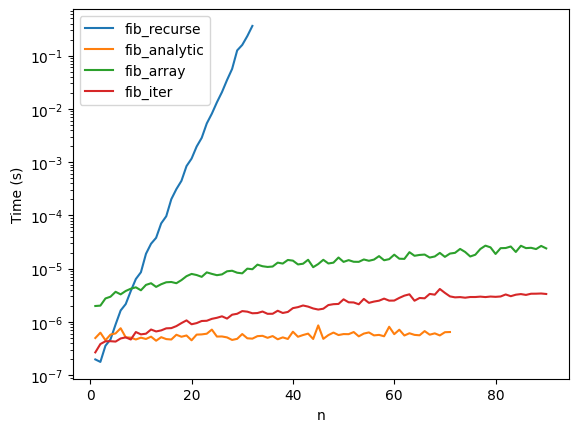

In [27]:
import matplotlib.pyplot as plt
import time

def timer(func, n, until=.1):
    start_time = time.time()
    repeats = 0
    while time.time()-start_time<until:
        func(n)
        repeats += 1
    return (time.time()-start_time)/repeats

for f, Nmax in [(fib_recurse, 32),
                (fib_analytic, 71),
                (fib_array, 90),
                (fib_iter, 90)]:
                # (fib_matrix, 90)]:
    N = list(range(1, Nmax+1))
    plt.semilogy(N, list(map(lambda n: timer(f, n), N)), label=f.__name__);
plt.ylabel('Time (s)')
plt.xlabel('n')
plt.legend(loc='upper left');